In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# some settings for displaying Pandas results
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision', 4)
pd.set_option('display.max_colwidth', -1)

In [2]:
# load train data profile
data_path = "home-credit-default-risk/application_train.csv"
pdf_data = pd.read_csv(data_path)
pdf_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559,0.7296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# load meta data
meta_path = "../02_pandas/reports/report_application_train.csv"
pdf_meta = pd.read_csv(meta_path)
pdf_meta

,name,sub_type,n_distinct,n_miss,n_negative,n_zeros,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9
0,SK_ID_CURR,int64,307511 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),189145.5000,278202.0000,367142.5000,307511.0,4.5626e+05,2.7818e+05,1.0000e+05,102790.1753,326682,414578,432657,346257,169928,228494,305986,450918,393627,121604
1,TARGET,int64,2 (0.00%),0 (0.00%),0 (0.00%),282686 (91.93%),0.0000,0.0000,0.0000,307511.0,1.0000e+00,8.0729e-02,0.0000e+00,0.2724,0,1,0,0,1,0,0,1,0,0
2,NAME_CONTRACT_TYPE,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
3,CODE_GENDER,object,3 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,M,M,M,M,M,F,M,F,F,F
4,FLAG_OWN_CAR,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Y,Y,N,N,N,N,N,Y,N,N
5,FLAG_OWN_REALTY,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Y,N,Y,Y,Y,Y,Y,N,Y,Y
6,CNT_CHILDREN,int64,15 (0.00%),0 (0.00%),0 (0.00%),215371 (70.04%),0.0000,0.0000,1.0000,307511.0,1.9000e+01,4.1705e-01,0.0000e+00,0.7221,0,1,0,0,0,0,0,1,2,0
7,AMT_INCOME_TOTAL,float64,2548 (0.83%),0 (0.00%),0 (0.00%),0 (0.00%),112500.0000,147150.0000,202500.0000,307511.0,1.1700e+08,1.6880e+05,2.5650e+04,237123.1463,166500.0,450000.0,157500.0,135000.0,202500.0,117000.0,90000.0,180000.0,157500.0,90000.0
8,AMT_CREDIT,float64,5603 (1.82%),0 (0.00%),0 (0.00%),0 (0.00%),270000.0000,513531.0000,808650.0000,307511.0,4.0500e+06,5.9903e+05,4.5000e+04,402490.7770,254700.0,1381113.0,450000.0,1764000.0,203760.0,254700.0,538704.0,630000.0,679500.0,755190.0
9,AMT_ANNUITY,float64,13672 (4.45%),12 (0.00%),0 (0.00%),0 (0.00%),16524.0000,24903.0000,34596.0000,307499.0,2.5803e+05,2.7109e+04,1.6155e+03,14493.7373,25191.0,39712.5,22500.0,48510.0,16227.0,25191.0,26046.0,23274.0,36202.5,36459.0


# Visualize functions 

In [4]:
# 
def grid_bar_charts(pdf, ls_cname, ncols = 3):
    """
    Vẽ nhiều bar chart cho các thuộc tính được xếp vào grid
    Cho số lượng grid column, ta sẽ fill out bar chart cho từng cell của grid
    """
    
    # tính số dòng cần cho grid
    n_cat = len(ls_cname)    
    nrows = int(math.ceil(n_cat * 1.0 / ncols))

    # khởi tạo figure gồm nrows * ncols cho grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3 * nrows))
    
    # dùng tuỳ chọn này để các chart được rời nhau
    fig.set_tight_layout(False)
    
    # fill out grid
    for i in range(nrows):
        for j in range(ncols):
            # xác định vị trí tên column trong danh sách dựa vào (i, j, ncols)
            idx = i * ncols + j
            
            # khi plot hết thì dừng
            if idx == n_cat:
                break
                
            # lấy tên column cần plot
            cname = ls_cname[idx]
            s00 = pdf[~pdf[cname].isna()]
            s00 = s00.groupby(cname).size()
            
            # sắp giá trị giảm dần trước khi plot
            s00.sort_values(ascending=False).plot.bar(ax=axes[i][j], rot=45)

    # plot grid
    plt.tight_layout()
    plt.show()
    
#     
def plot_wordcloud(pdf, ls_cname):
    """
    Vẽ wordcloud cho biến có nhiều giá trị categories
    """
    
    for cname in ls_cname:
        # get sequence of types
        s00 = pdf[~pdf[cname].isna()][cname]
        text = " ".join(s00.astype(str).tolist())

        # generate wordcloud
        wordcloud = WordCloud(background_color="white", width=1600, height=800).generate(text)

        # 
        fig, ax = plt.subplots(figsize=(15, 15))
        fig.set_tight_layout(False)
        
        # plot wordcloud
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.axis("off")
        ax.set_title("Word cloud of {}".format(cname), fontsize=20)
        
        #
        plt.tight_layout()
        plt.show()    
        
# 
def grid_histogram(pdf, ls_cname, ncols = 3):
    """
    Vẽ nhiều histogram cho các thuộc tính được xếp vào grid
    Cho số lượng grid column, ta sẽ fill out histogram cho từng cell của grid
    """
    
    # tính số dòng cần cho grid
    n_cat = len(ls_cname)    
    nrows = int(math.ceil(n_cat * 1.0 / ncols))

    # khởi tạo figure gồm nrows * ncols cho grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
    
    # dùng tuỳ chọn này để các chart được rời nhau
    fig.set_tight_layout(False)
    
    # fill out grid
    for i in range(nrows):
        for j in range(ncols):
            
            # xác định vị trí tên column trong danh sách dựa vào (i, j, ncols)
            idx = i * ncols + j
            
            # khi plot hết thì dừng
            if idx == n_cat:
                break
                
            cname = ls_cname[idx]
            s00 = pdf[~pdf[cname].isna()][cname]
            s00.plot(kind="hist", ax=axes[i][j], rot=45, title=cname)
            
    plt.tight_layout()
    plt.show()        
    
# 
def plot_continuous_data(s00, title):
    """
    Quan sát continuous data bằng histogram và boxplot
    """
    
    # khởi tạo figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    # plot
    s00.hist(bins=30, ax=ax1)
    s00.plot.box(ax=ax2)
    
    #
    plt.suptitle(title)
    plt.show()

# Visualize for categorical data

In [5]:
# check categorical data attributes
ls_cat_name = pdf_meta[pdf_meta["sub_type"] == "object"]["name"].tolist()
ls_cat_name

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [6]:
# if number of category is small we could use bar chart, otherwise use cloud chart
pdf_meta00 = pdf_meta[pdf_meta["name"].isin(ls_cat_name)][["name", "n_distinct"]]
pdf_meta00["chart"] = pdf_meta00["n_distinct"].apply(lambda x: "wordcloud" if int(x.split()[0]) > 10 else "bar")
pdf_meta00

,name,n_distinct,chart
2,NAME_CONTRACT_TYPE,2 (0.00%),bar
3,CODE_GENDER,3 (0.00%),bar
4,FLAG_OWN_CAR,2 (0.00%),bar
5,FLAG_OWN_REALTY,2 (0.00%),bar
11,NAME_TYPE_SUITE,7 (0.00%),bar
12,NAME_INCOME_TYPE,8 (0.00%),bar
13,NAME_EDUCATION_TYPE,5 (0.00%),bar
14,NAME_FAMILY_STATUS,6 (0.00%),bar
15,NAME_HOUSING_TYPE,6 (0.00%),bar
28,OCCUPATION_TYPE,18 (0.01%),wordcloud


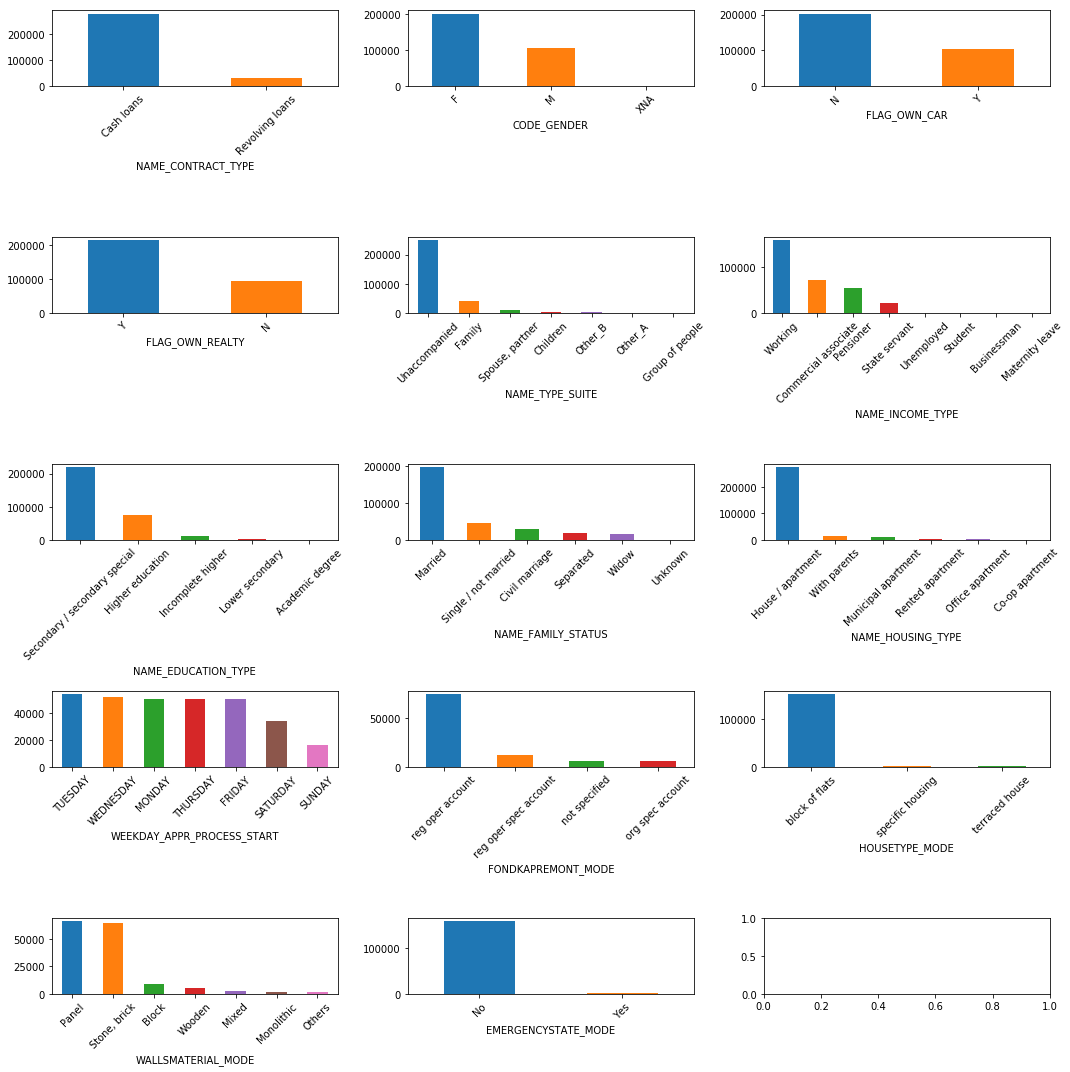

In [7]:
ls_cat_bar = pdf_meta00.query("chart == 'bar'")["name"].tolist()
grid_bar_charts(pdf_data, ls_cat_bar)

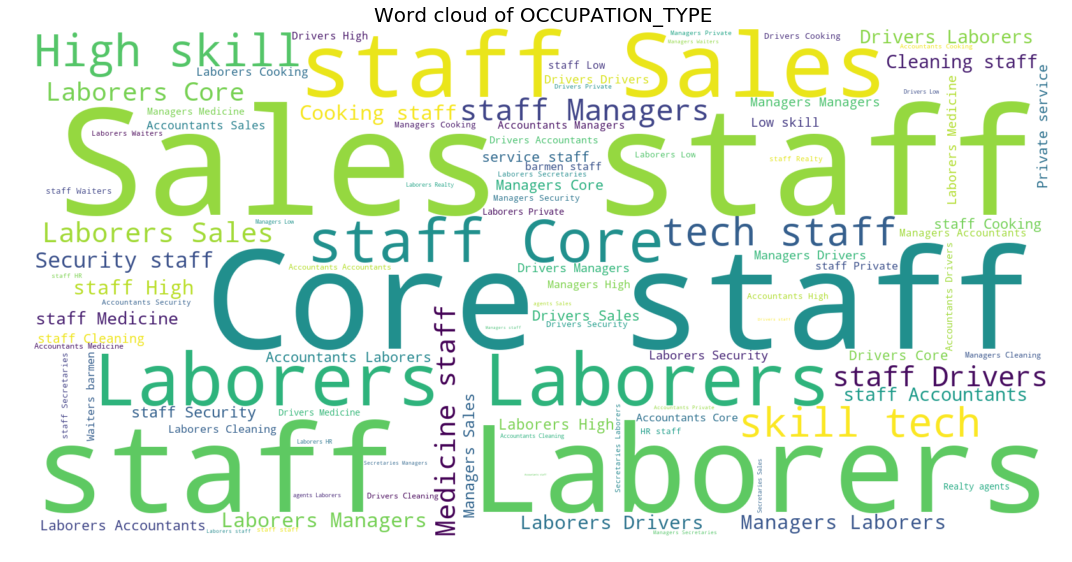

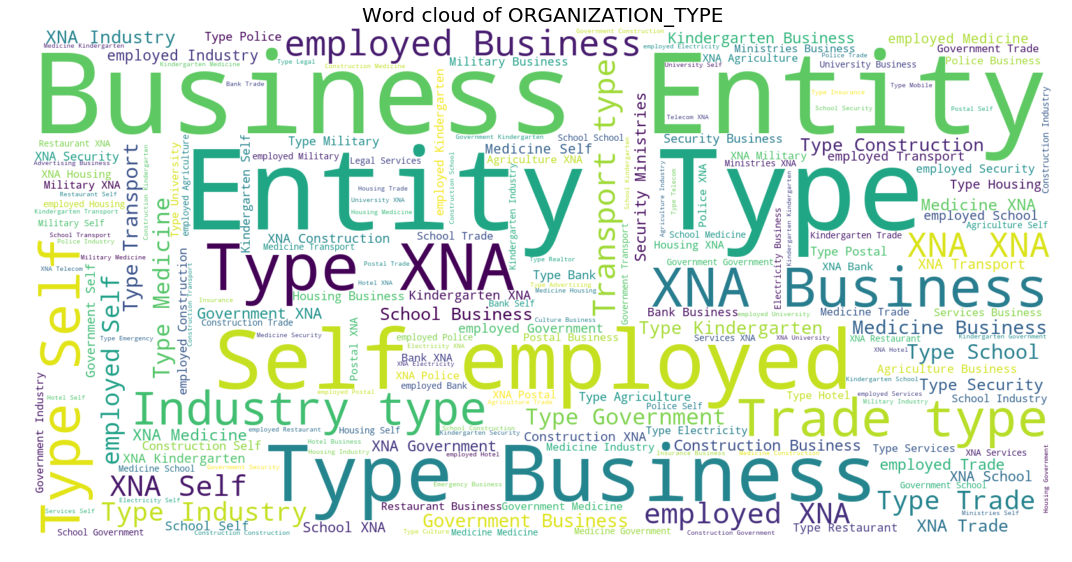

In [8]:
ls_cat_wordcloud = pdf_meta00.query("chart == 'wordcloud'")["name"].tolist()
plot_wordcloud(pdf_data, ls_cat_wordcloud)

# Visualization for numerical data

In [9]:
# check numerical data attributes
ls_num_name = pdf_meta[pdf_meta["sub_type"] == "int64"]["name"].tolist()
ls_num_name

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [10]:
# if number of distinct values is small we could use bar chart, otherwise use histogram
pdf_meta00 = pdf_meta[pdf_meta["name"].isin(ls_num_name)][["name", "n_distinct"]]
pdf_meta00["chart"] = pdf_meta00["n_distinct"].apply(lambda x: "histogram" if int(x.split()[0]) > 10 else "bar")
pdf_meta00

,name,n_distinct,chart
0,SK_ID_CURR,307511 (100.00%),histogram
1,TARGET,2 (0.00%),bar
6,CNT_CHILDREN,15 (0.00%),histogram
17,DAYS_BIRTH,17460 (5.68%),histogram
18,DAYS_EMPLOYED,12574 (4.09%),histogram
20,DAYS_ID_PUBLISH,6168 (2.01%),histogram
22,FLAG_MOBIL,2 (0.00%),bar
23,FLAG_EMP_PHONE,2 (0.00%),bar
24,FLAG_WORK_PHONE,2 (0.00%),bar
25,FLAG_CONT_MOBILE,2 (0.00%),bar


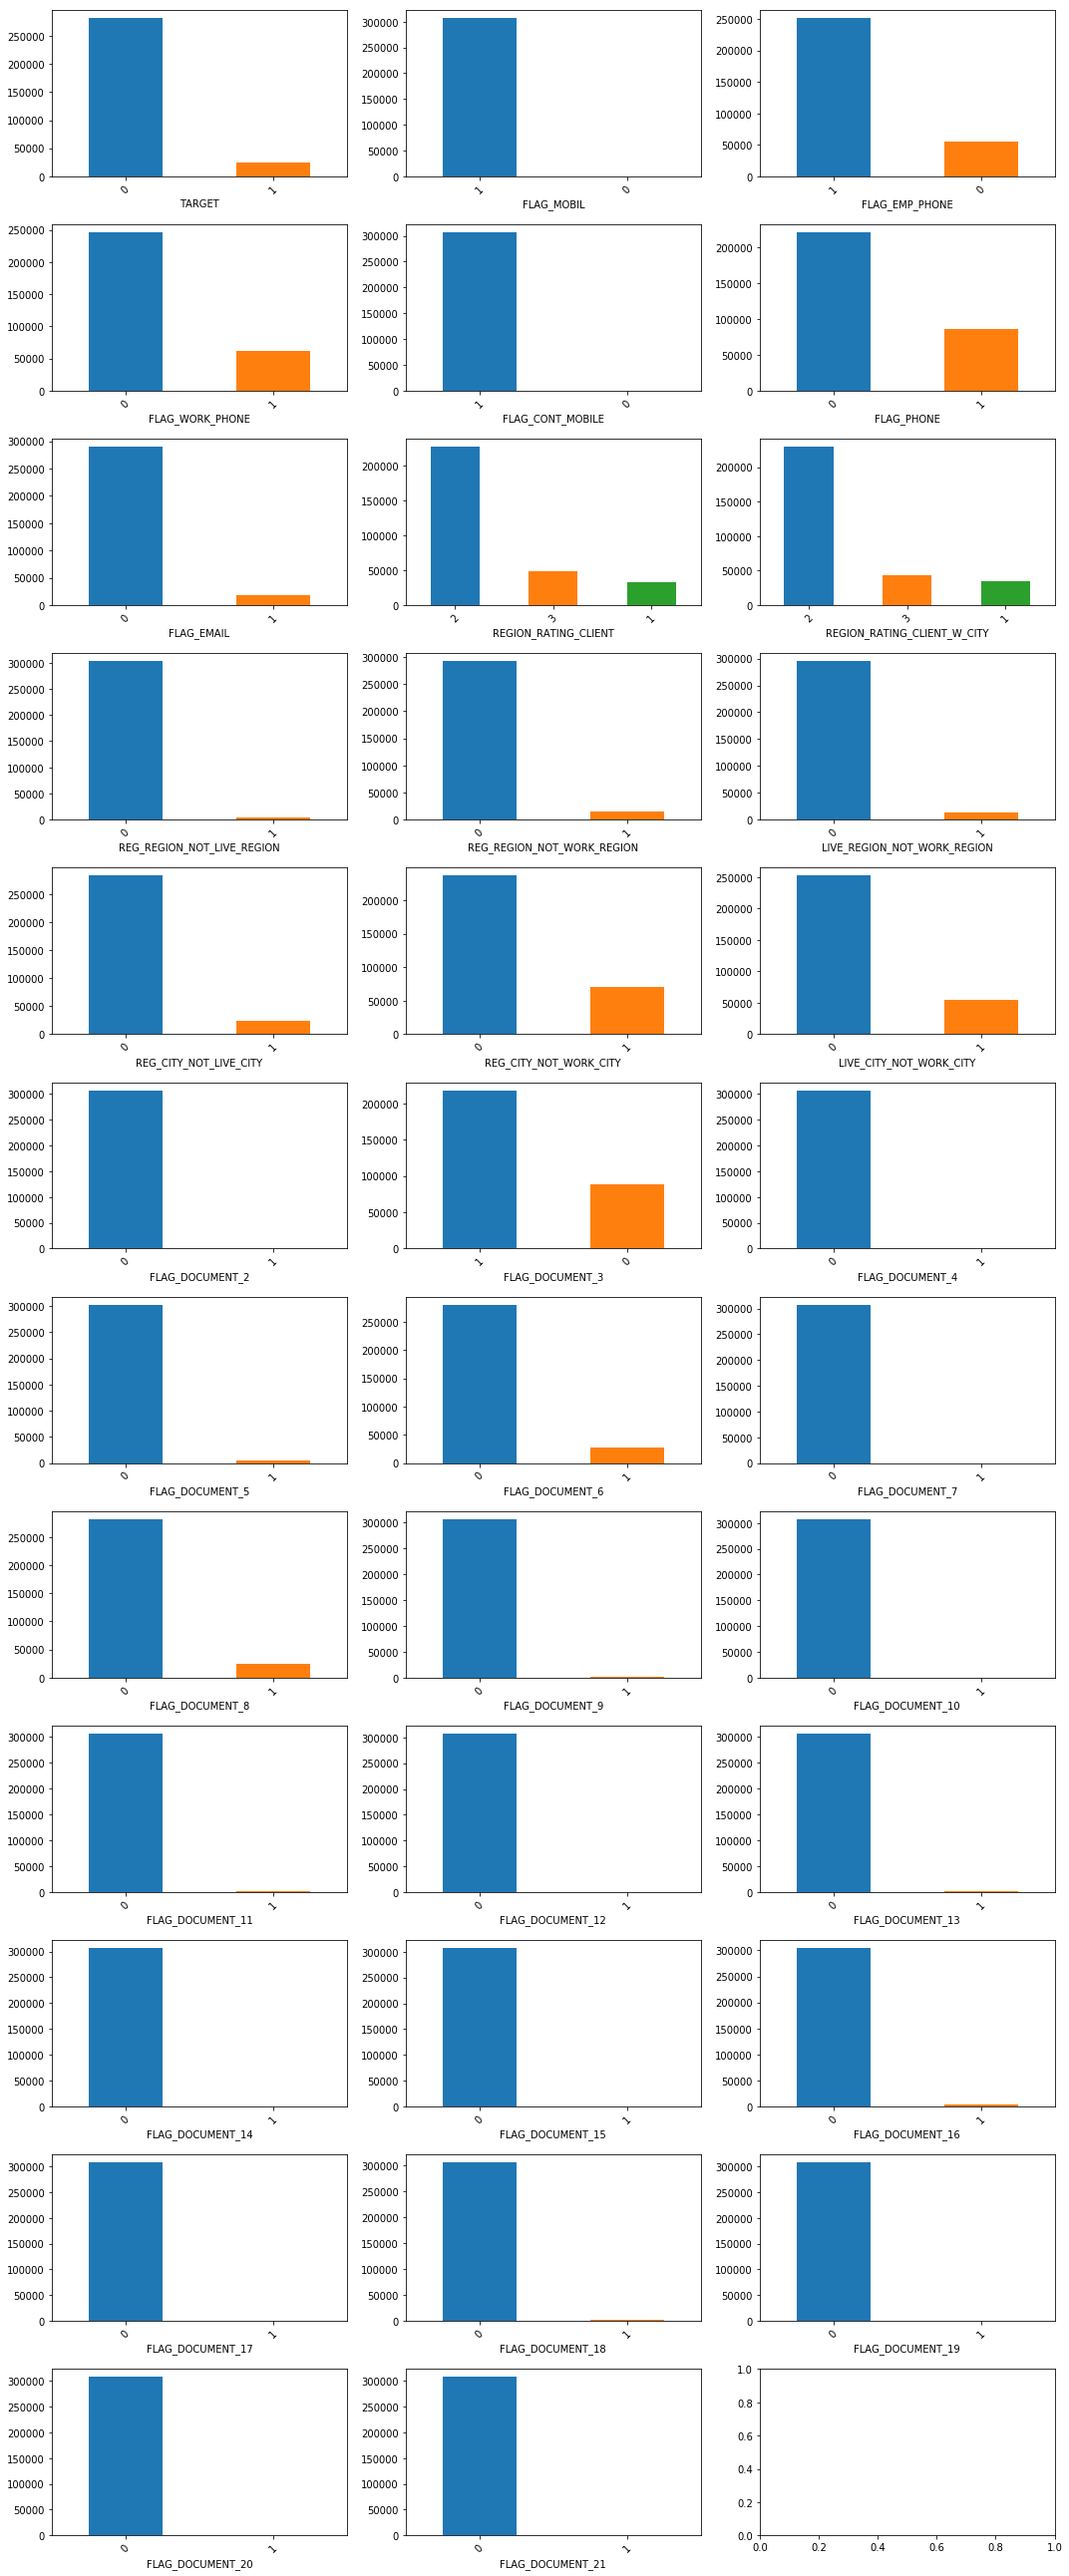

In [11]:
ls_num_bar = pdf_meta00.query("chart == 'bar'")["name"].tolist()
grid_bar_charts(pdf_data, ls_num_bar)

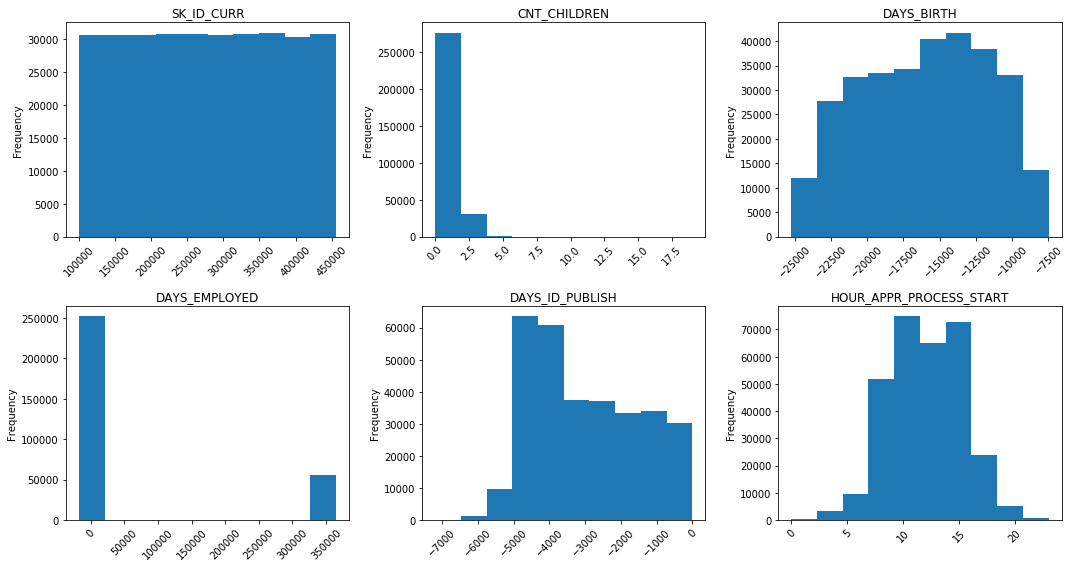

In [12]:
ls_num_hist = pdf_meta00.query("chart == 'histogram'")["name"].tolist()
grid_histogram(pdf_data, ls_num_hist)

In [13]:
# check continuous data attributes
ls_continuous_name = pdf_meta[pdf_meta["sub_type"] == "float64"]["name"].tolist()
ls_continuous_name

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

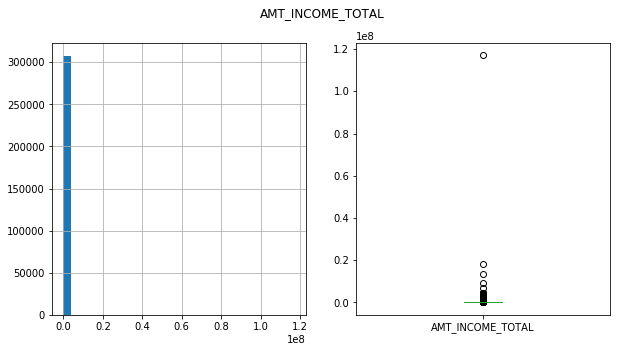

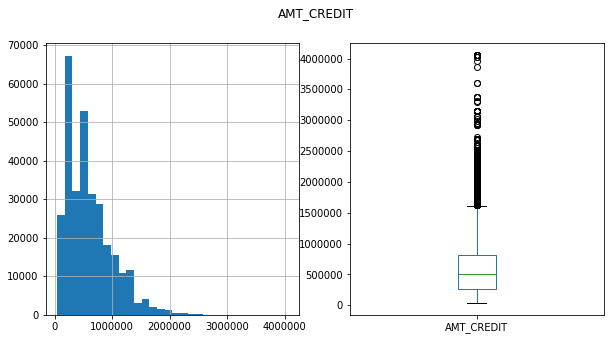

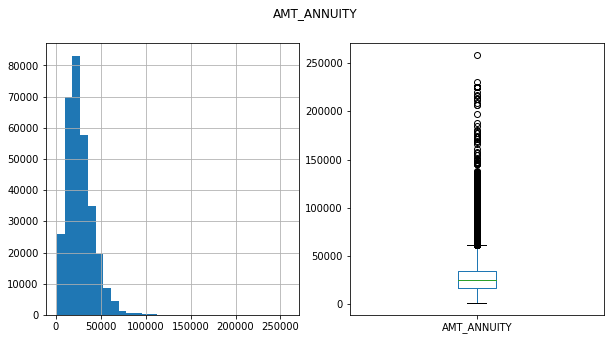

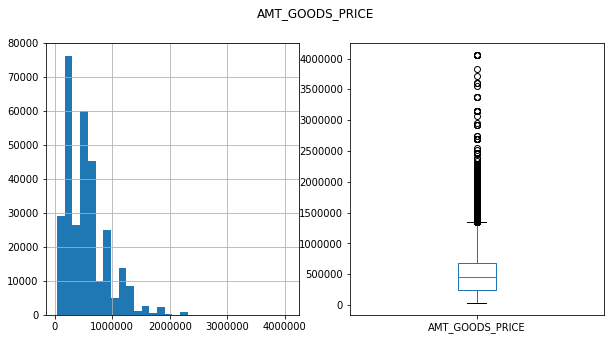

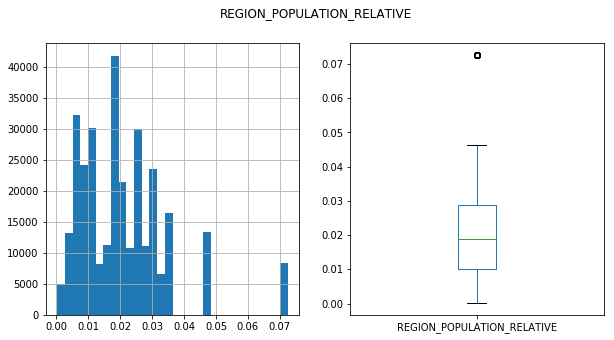

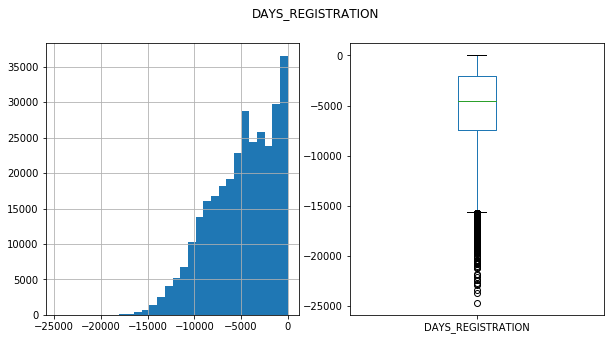

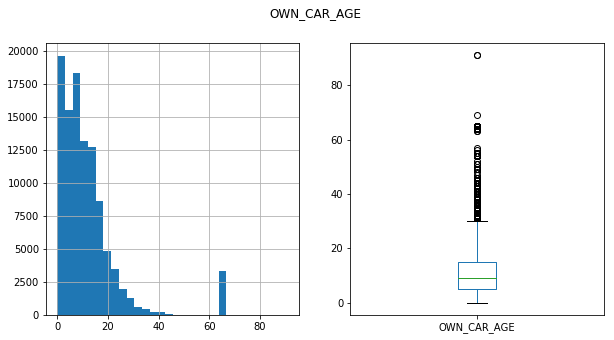

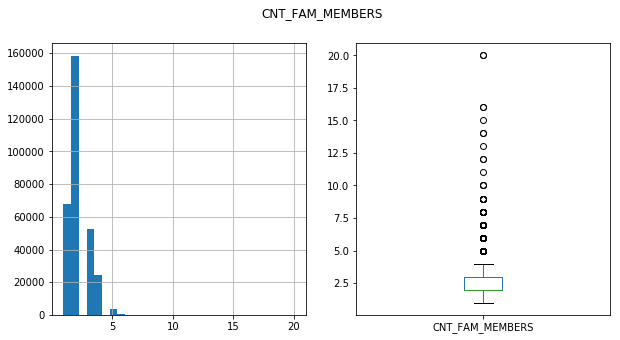

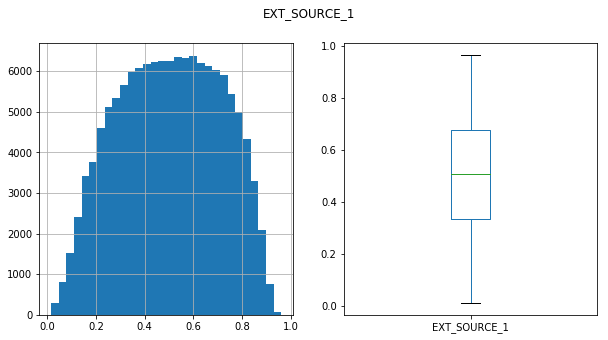

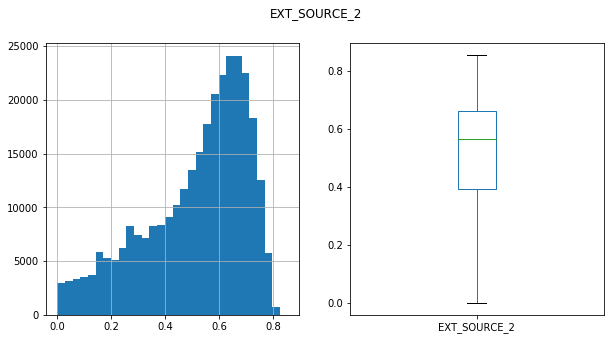

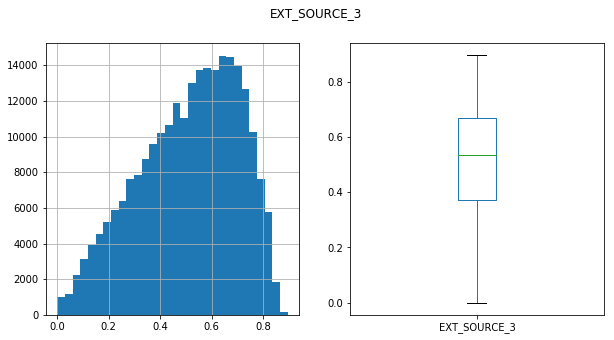

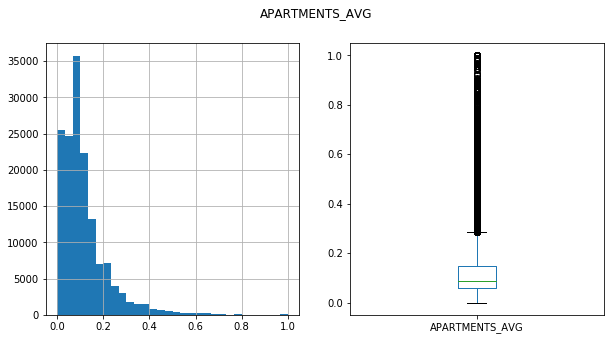

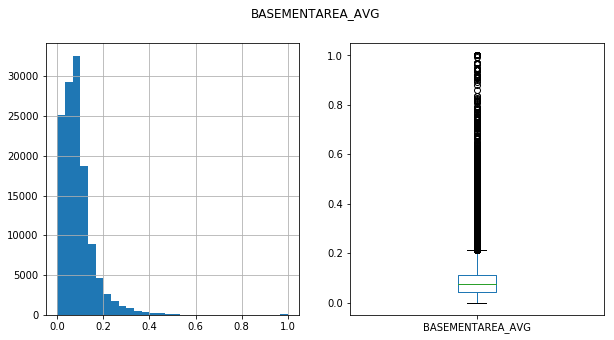

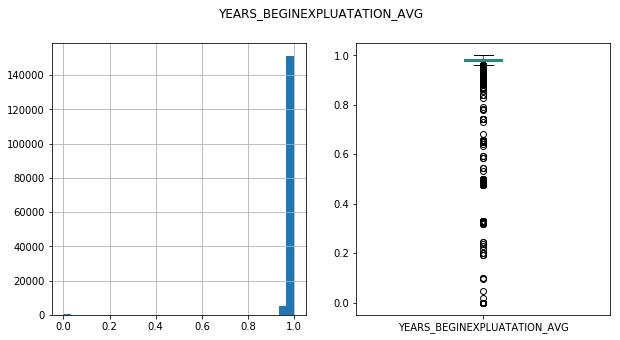

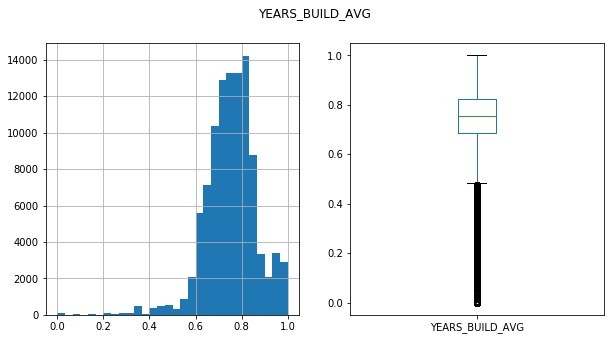

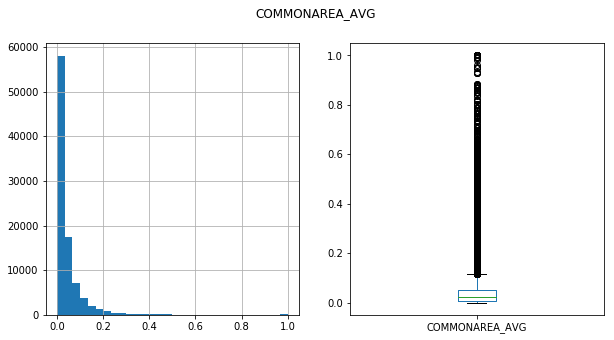

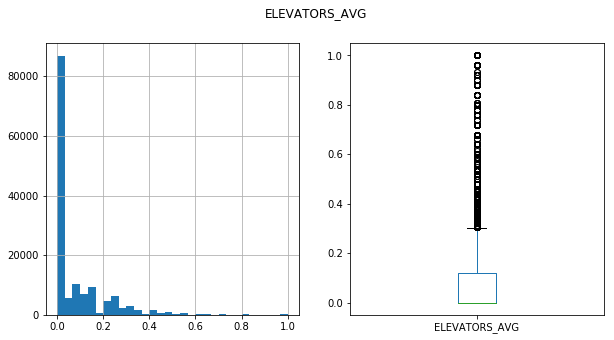

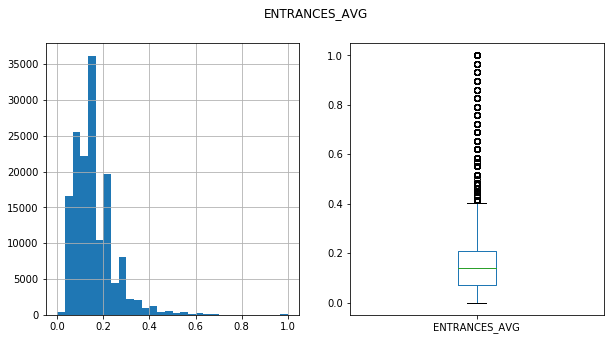

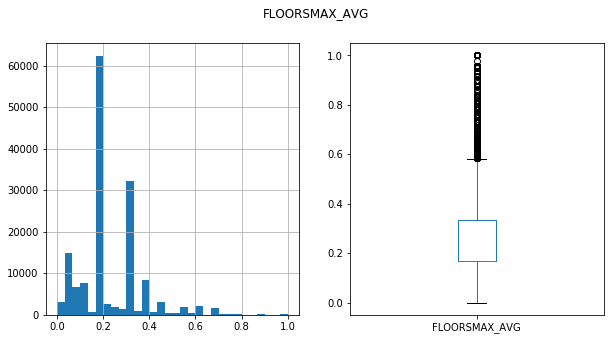

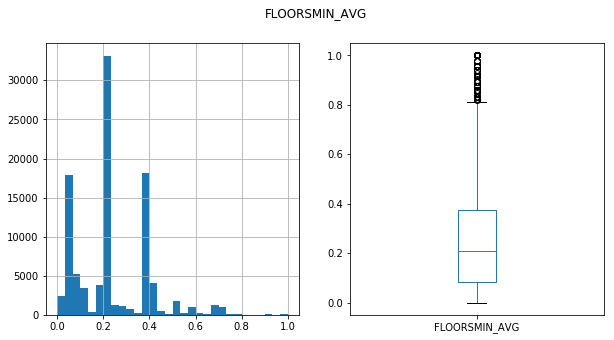

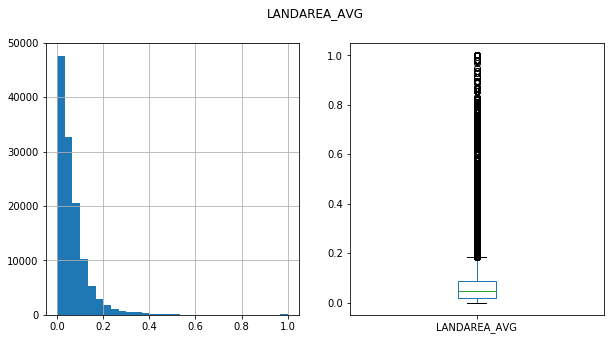

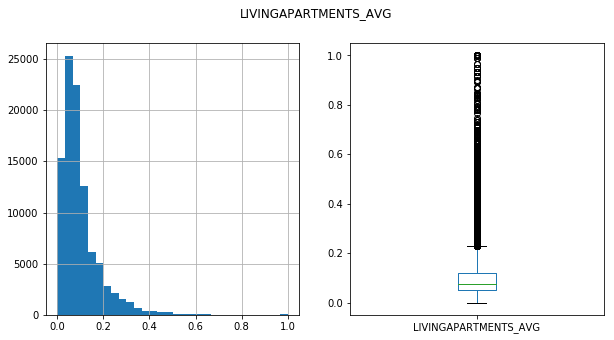

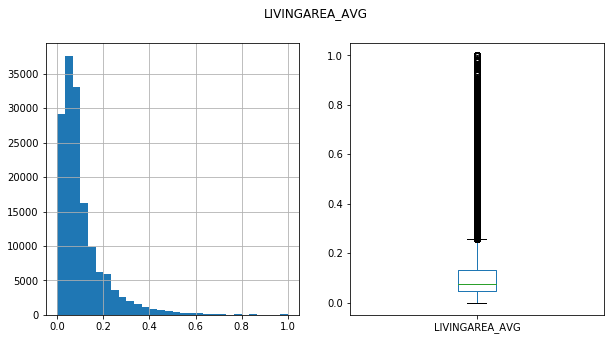

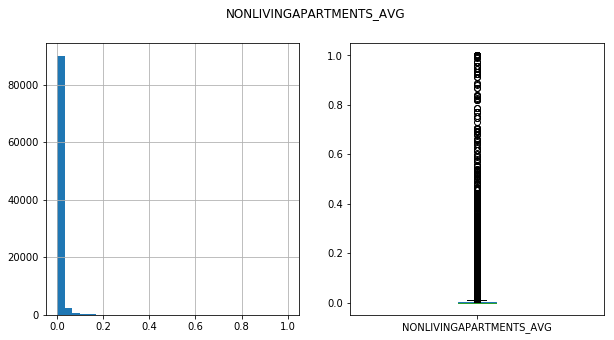

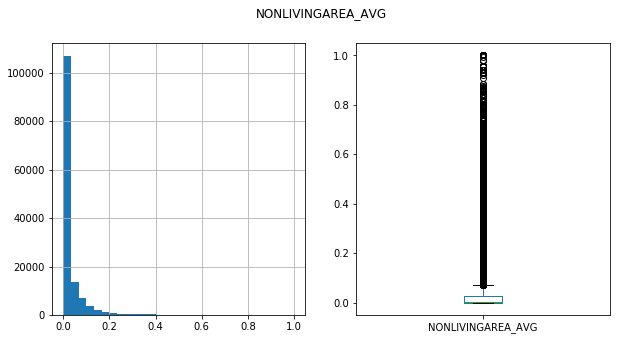

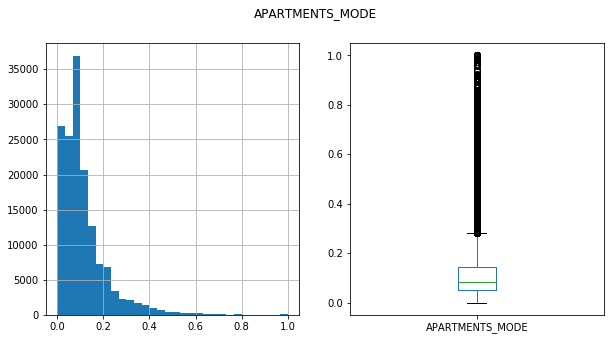

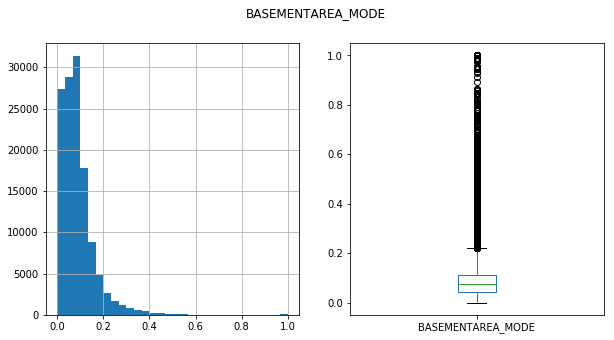

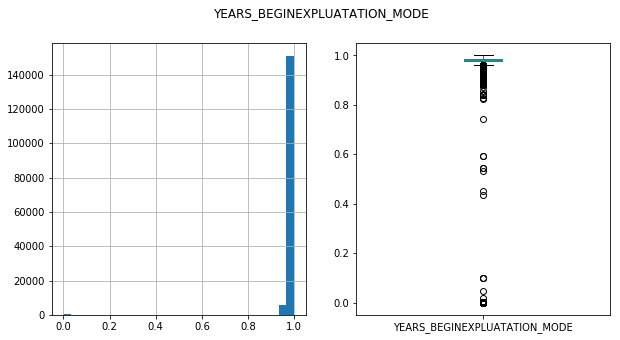

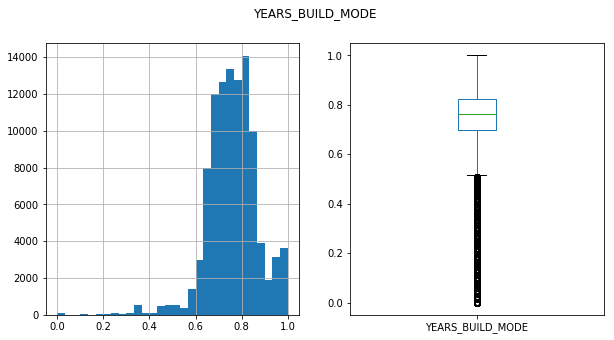

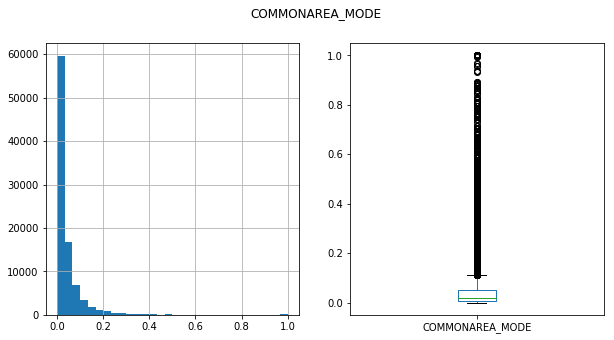

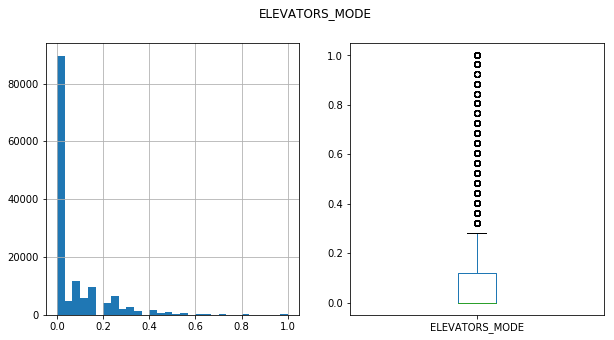

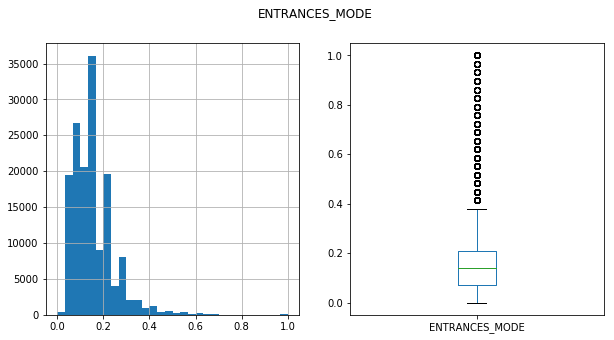

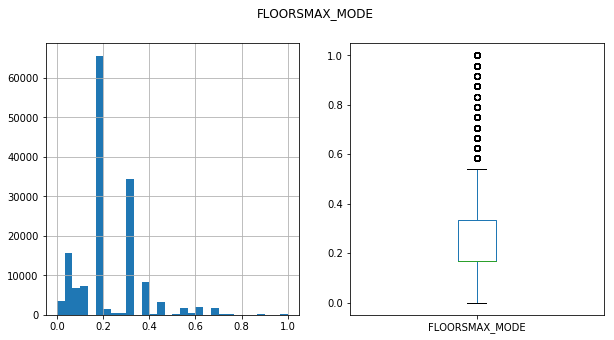

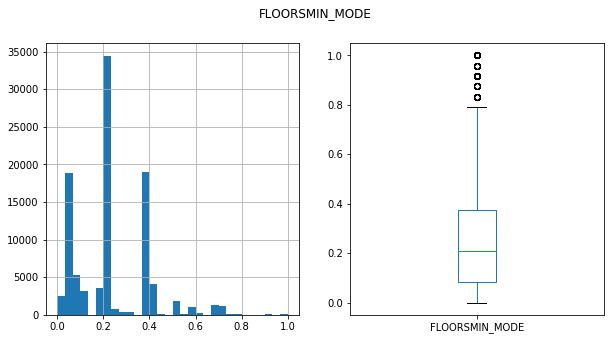

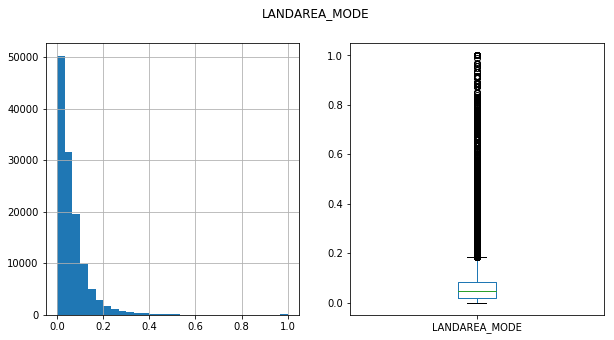

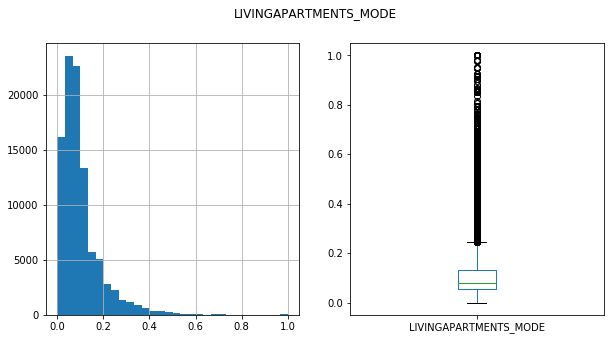

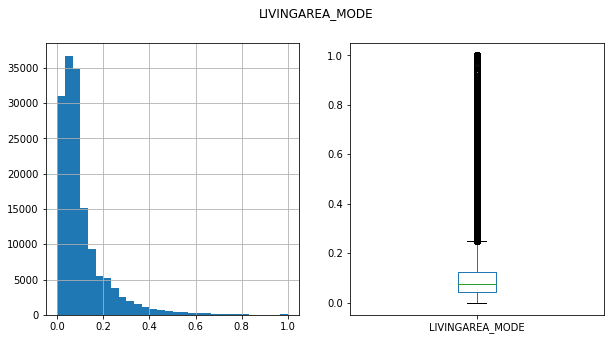

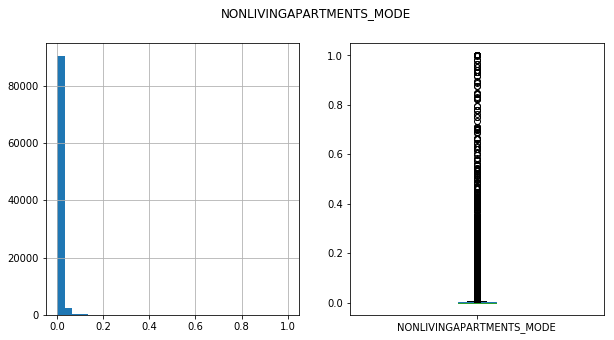

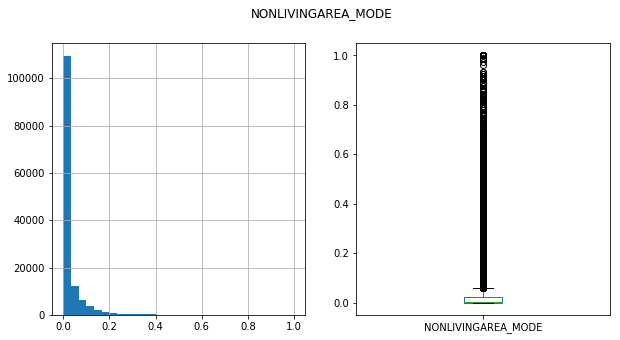

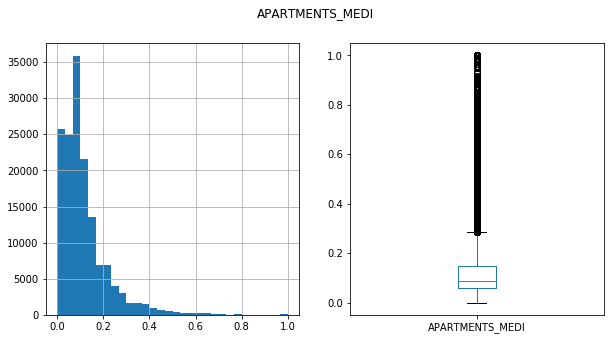

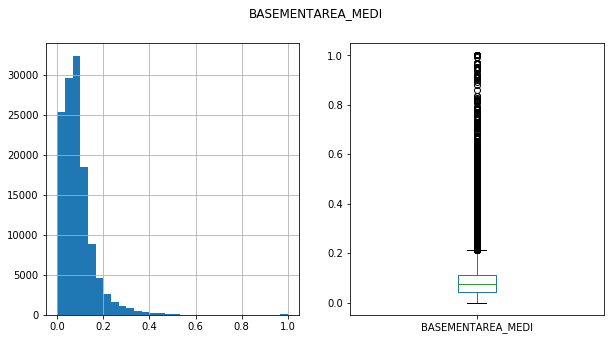

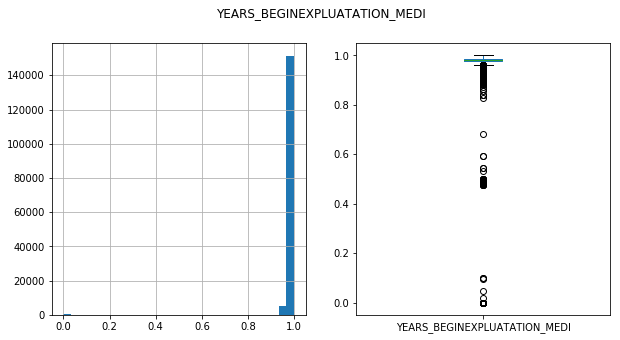

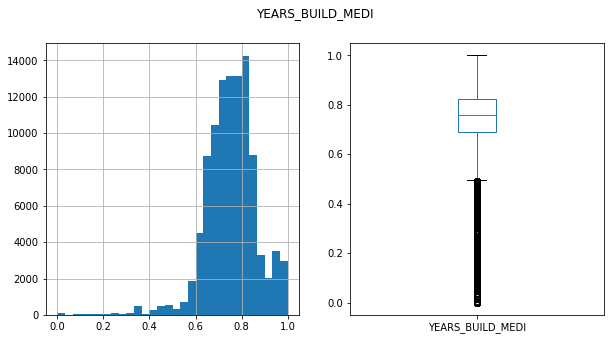

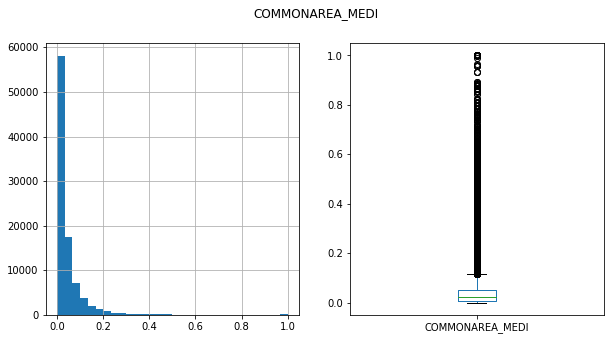

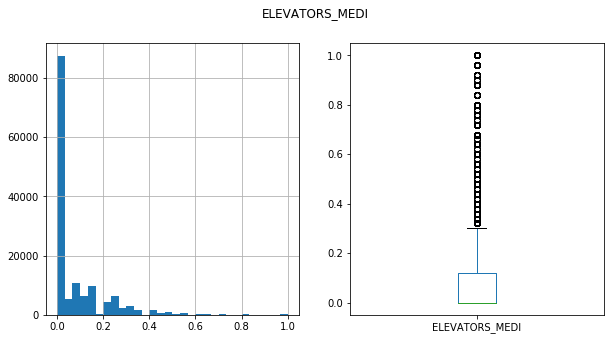

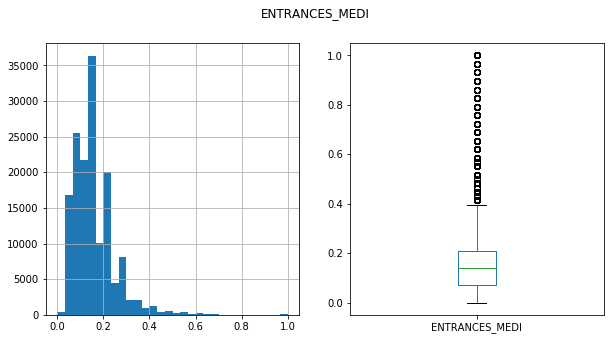

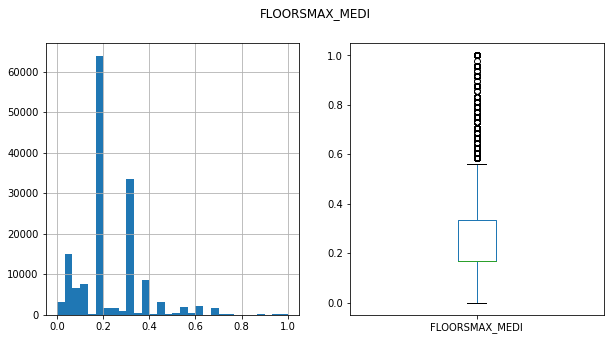

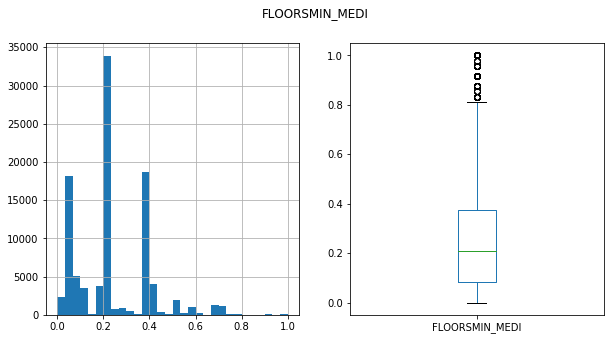

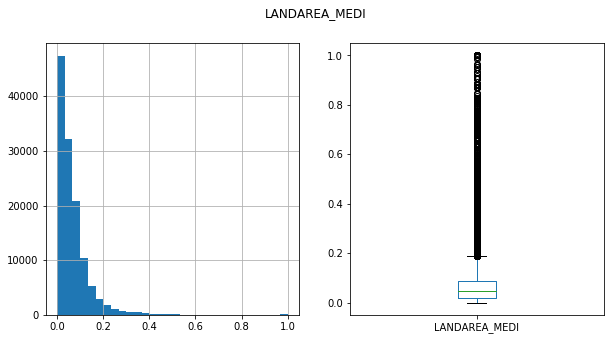

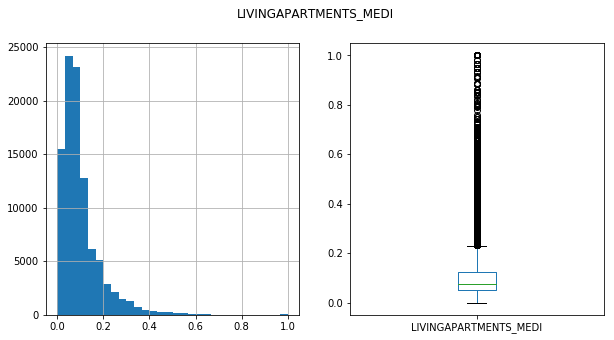

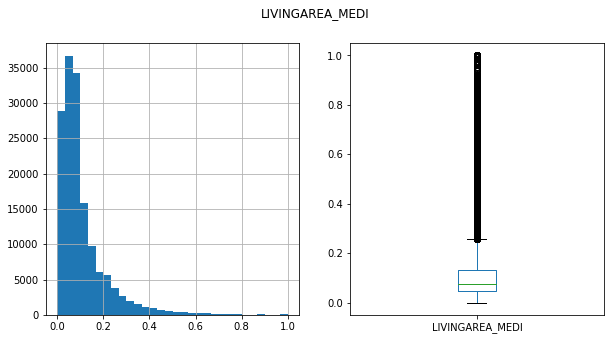

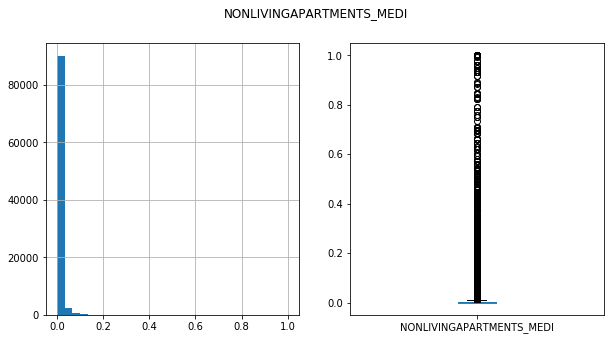

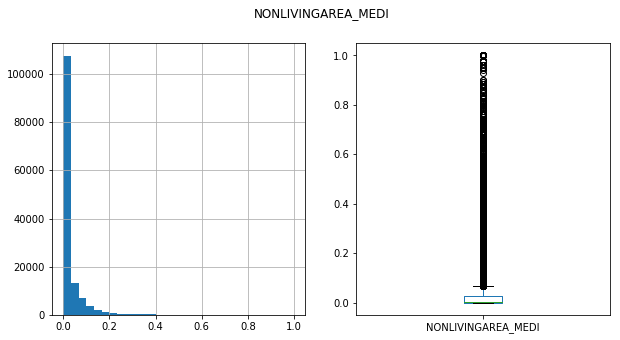

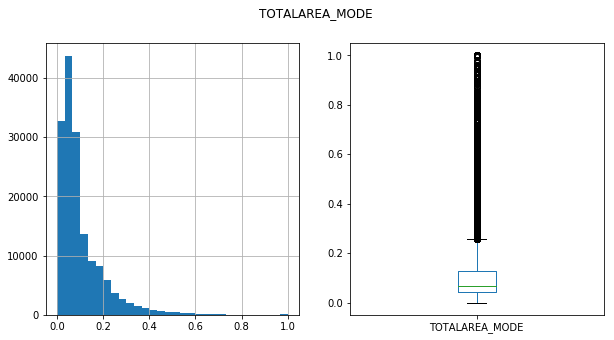

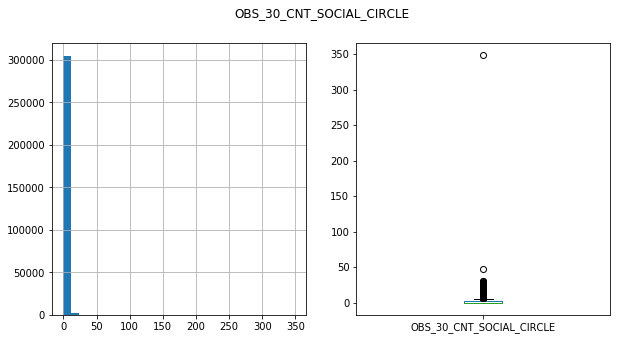

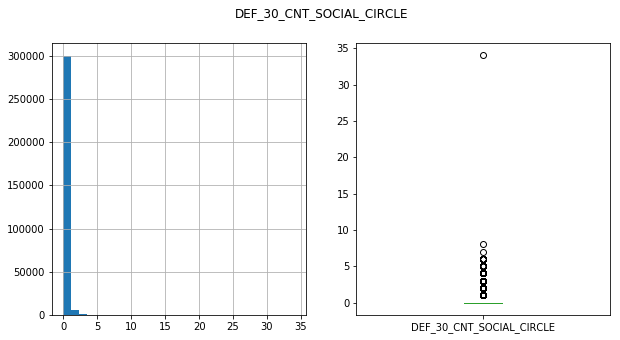

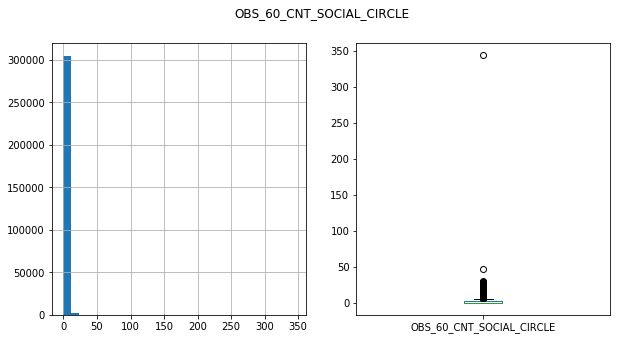

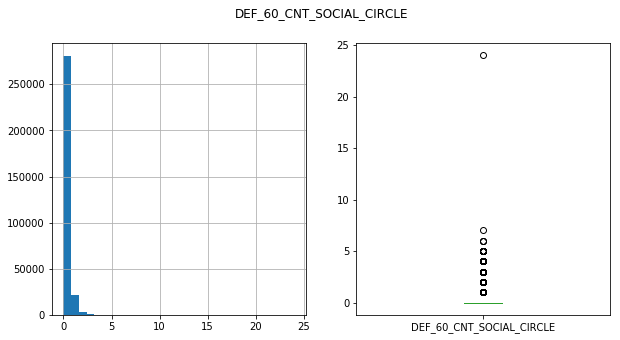

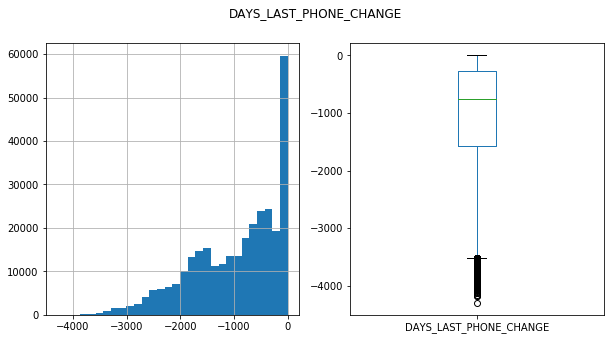

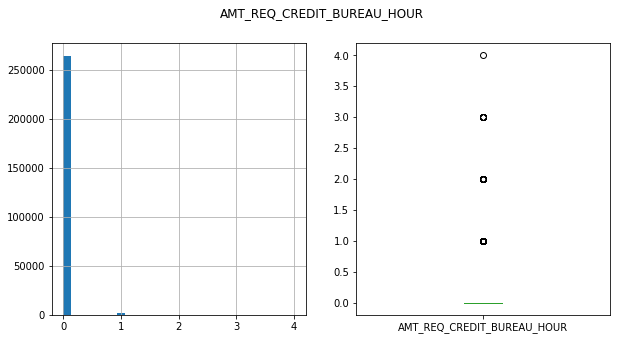

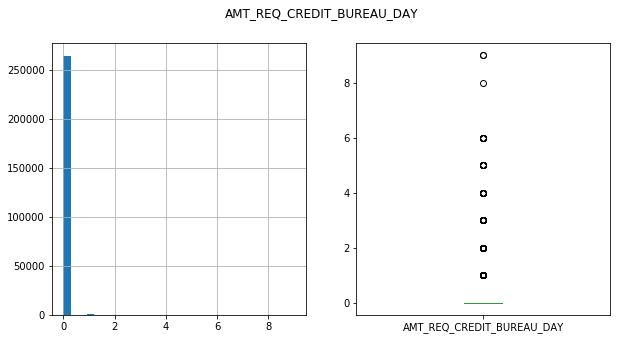

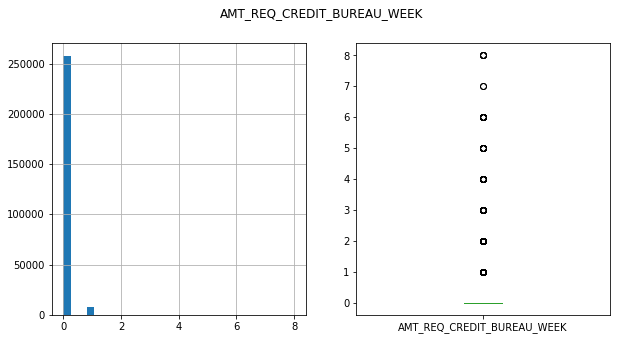

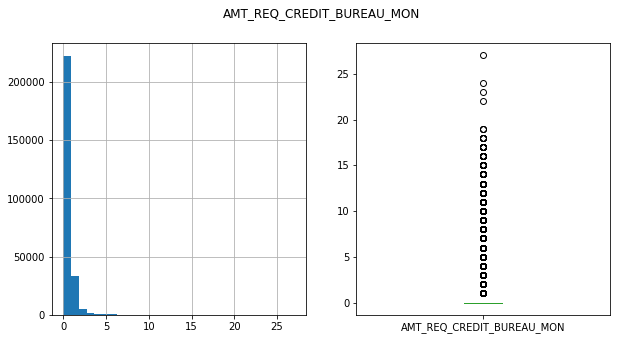

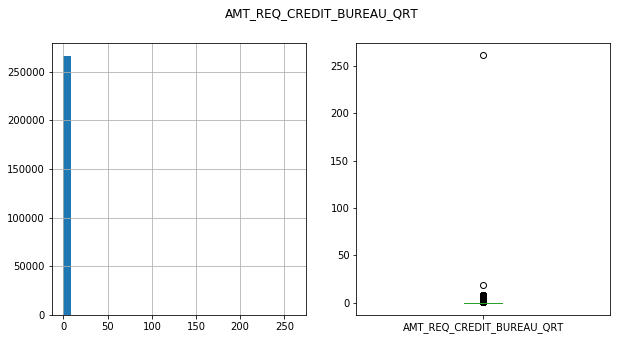

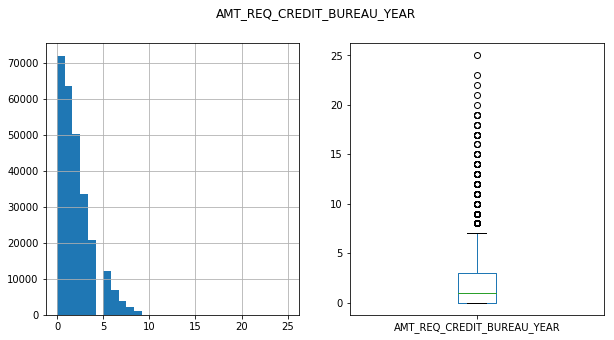

In [14]:
for cname in ls_continuous_name:
    s00 = pdf_data[~pdf_data[cname].isna()][cname]    
    plot_continuous_data(s00, cname)